# LangChain for LLM Application Development



## Loading in openai

In [1]:
import os
import openai

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file
openai.api_key = os.environ['OPENAI_API_KEY']

def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0, 
    )
    return response.choices[0].message["content"]


In [2]:
get_completion("What is 1+1?")

'As an AI language model, I can tell you that the answer to 1+1 is 2.'

## Loading in langchain

langchain is an abstraction for building applications with language models. Provides:
- abstraction for languague model (plug in different models)
- useful functionsality.. data access, agent
- memory, prompt optimisation

In [3]:
from langchain.chat_models import ChatOpenAI
chat = ChatOpenAI(temperature=0.0)
chat

ChatOpenAI(verbose=False, callbacks=None, callback_manager=None, client=<class 'openai.api_resources.chat_completion.ChatCompletion'>, model_name='gpt-3.5-turbo', temperature=0.0, model_kwargs={}, openai_api_key=None, openai_api_base=None, openai_organization=None, openai_proxy=None, request_timeout=None, max_retries=6, streaming=False, n=1, max_tokens=None)

In [4]:
template_string = """Translate the text \
that is delimited by triple backticks \
into a style that is {style}. \
text: ```{text}```
"""

In [5]:
from langchain.prompts import ChatPromptTemplate

prompt_template = ChatPromptTemplate.from_template(template_string)
prompt_template

ChatPromptTemplate(input_variables=['style', 'text'], output_parser=None, partial_variables={}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['style', 'text'], output_parser=None, partial_variables={}, template='Translate the text that is delimited by triple backticks into a style that is {style}. text: ```{text}```\n', template_format='f-string', validate_template=True), additional_kwargs={})])

In [6]:
prompt_template.messages[0].prompt

PromptTemplate(input_variables=['style', 'text'], output_parser=None, partial_variables={}, template='Translate the text that is delimited by triple backticks into a style that is {style}. text: ```{text}```\n', template_format='f-string', validate_template=True)

In [7]:
prompt_template.messages[0].prompt.input_variables

['style', 'text']

In [8]:
customer_style = """American English \
in a calm and respectful tone
"""

In [9]:
customer_email = """
Arrr, I be fuming that me blender lid \
flew off and splattered me kitchen walls \
with smoothie! And to make matters worse, \
the warranty don't cover the cost of \
cleaning up me kitchen. I need yer help \
right now, matey!
"""

In [10]:
customer_messages = prompt_template.format_messages(
                    style=customer_style,
                    text=customer_email)

In [11]:
print(type(customer_messages))
print(type(customer_messages[0]))

<class 'list'>
<class 'langchain.schema.HumanMessage'>


In [12]:
customer_response = chat(customer_messages)

In [13]:
print(customer_response.content)

I'm really frustrated that my blender lid flew off and made a mess of my kitchen walls with smoothie. To add to my frustration, the warranty doesn't cover the cost of cleaning up my kitchen. Can you please help me out, friend?


Prompt Templates are a useful abstraction for resuing long/complicated prompts

## output paraser 

In [14]:
{
  "gift": False,
  "delivery_days": 5,
  "price_value": "pretty affordable!"
}

{'gift': False, 'delivery_days': 5, 'price_value': 'pretty affordable!'}

In [15]:
customer_review = """\
This leaf blower is pretty amazing.  It has four settings:\
candle blower, gentle breeze, windy city, and tornado. \
It arrived in two days, just in time for my wife's \
anniversary present. \
I think my wife liked it so much she was speechless. \
So far I've been the only one using it, and I've been \
using it every other morning to clear the leaves on our lawn. \
It's slightly more expensive than the other leaf blowers \
out there, but I think it's worth it for the extra features.
"""

review_template = """\
For the following text, extract the following information:

gift: Was the item purchased as a gift for someone else? \
Answer True if yes, False if not or unknown.

delivery_days: How many days did it take for the product \
to arrive? If this information is not found, output -1.

price_value: Extract any sentences about the value or price,\
and output them as a comma separated Python list.

Format the output as JSON with the following keys:
gift
delivery_days
price_value

text: {text}
"""

In [16]:
from langchain.prompts import ChatPromptTemplate

prompt_template = ChatPromptTemplate.from_template(review_template)
print(prompt_template)

input_variables=['text'] output_parser=None partial_variables={} messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['text'], output_parser=None, partial_variables={}, template='For the following text, extract the following information:\n\ngift: Was the item purchased as a gift for someone else? Answer True if yes, False if not or unknown.\n\ndelivery_days: How many days did it take for the product to arrive? If this information is not found, output -1.\n\nprice_value: Extract any sentences about the value or price,and output them as a comma separated Python list.\n\nFormat the output as JSON with the following keys:\ngift\ndelivery_days\nprice_value\n\ntext: {text}\n', template_format='f-string', validate_template=True), additional_kwargs={})]


In [17]:
messages = prompt_template.format_messages(text=customer_review)
chat = ChatOpenAI(temperature=0.0)
response = chat(messages)
print(response.content)


{
    "gift": true,
    "delivery_days": 2,
    "price_value": ["It's slightly more expensive than the other leaf blowers out there, but I think it's worth it for the extra features."]
}


In [18]:
type(response.content)

str

## Langchain Memory

Language models odn't natural have memory. 

Outline : 

- ConversationBufferMemory - stores full convo 
- ConversationBufferWindowMemory - stores k interactions
- ConversationTokenBufferMemory - stores k tokens
- ConversationSummaryMemory - stores summary of conversation so far

In [19]:
from langchain.chat_models import ChatOpenAI
from langchain.chains import ConversationChain
from langchain.memory import ConversationBufferMemory


In [20]:
llm = ChatOpenAI(temperature=0.0)
memory = ConversationBufferMemory() 
conversation = ConversationChain(
    llm=llm, 
    memory = memory,
    verbose=True
)

In [21]:
conversation.predict(input="Hi, my name is Andrew")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Hi, my name is Andrew
AI:

> Finished chain.


"Hello Andrew, it's nice to meet you. My name is AI. How can I assist you today?"

In [22]:
conversation.predict(input="What is 1+1?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi, my name is Andrew
AI: Hello Andrew, it's nice to meet you. My name is AI. How can I assist you today?
Human: What is 1+1?
AI:

> Finished chain.


'The answer to 1+1 is 2.'

In [23]:
conversation.predict(input="What is my name?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi, my name is Andrew
AI: Hello Andrew, it's nice to meet you. My name is AI. How can I assist you today?
Human: What is 1+1?
AI: The answer to 1+1 is 2.
Human: What is my name?
AI:

> Finished chain.


'Your name is Andrew, as you mentioned earlier.'

In [24]:
print(memory.buffer)

Human: Hi, my name is Andrew
AI: Hello Andrew, it's nice to meet you. My name is AI. How can I assist you today?
Human: What is 1+1?
AI: The answer to 1+1 is 2.
Human: What is my name?
AI: Your name is Andrew, as you mentioned earlier.


In [25]:
memory.load_memory_variables({})

{'history': "Human: Hi, my name is Andrew\nAI: Hello Andrew, it's nice to meet you. My name is AI. How can I assist you today?\nHuman: What is 1+1?\nAI: The answer to 1+1 is 2.\nHuman: What is my name?\nAI: Your name is Andrew, as you mentioned earlier."}

In [26]:
# add custom context:
memory = ConversationBufferMemory()
memory.save_context({"input": "Hi"},  
                    {"output": "What's up"})

In [27]:
print(memory.buffer)

Human: Hi
AI: What's up


Memory just stores convo and adds to context and sends to llm. 
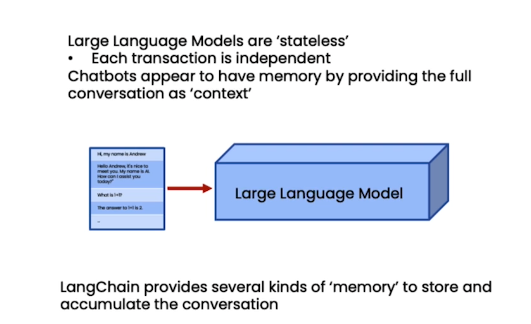

- gets more expensive with more tokens
- can run out of context

In [28]:
from langchain.memory import ConversationBufferWindowMemory

In [29]:
memory = ConversationBufferWindowMemory(k=1)               

In [30]:
memory.save_context({"input": "Hi"},
                    {"output": "What's up"})
memory.save_context({"input": "Not much, just hanging"},
                    {"output": "Cool"})


In [31]:
memory.load_memory_variables({})

{'history': 'Human: Not much, just hanging\nAI: Cool'}

The window stores k=1 recent messages

In [32]:
from langchain.memory import ConversationTokenBufferMemory
from langchain.llms import OpenAI
llm = ChatOpenAI(temperature=0.0)

memory = ConversationTokenBufferMemory(llm=llm, max_token_limit=30)
memory.save_context({"input": "AI is what?!"},
                    {"output": "Amazing!"})
memory.save_context({"input": "Backpropagation is what?"},
                    {"output": "Beautiful!"})
memory.save_context({"input": "Chatbots are what?"}, 
                    {"output": "Charming!"})

In [33]:
memory.load_memory_variables({})

{'history': 'AI: Beautiful!\nHuman: Chatbots are what?\nAI: Charming!'}

In [34]:
from langchain.memory import ConversationSummaryBufferMemory

# create a long string
schedule = "There is a meeting at 8am with your product team. \
You will need your powerpoint presentation prepared. \
9am-12pm have time to work on your LangChain \
project which will go quickly because Langchain is such a powerful tool. \
At Noon, lunch at the italian resturant with a customer who is driving \
from over an hour away to meet you to understand the latest in AI. \
Be sure to bring your laptop to show the latest LLM demo."

memory = ConversationSummaryBufferMemory(llm=llm, max_token_limit=100)
memory.save_context({"input": "Hello"}, {"output": "What's up"})
memory.save_context({"input": "Not much, just hanging"},
                    {"output": "Cool"})
memory.save_context({"input": "What is on the schedule today?"}, 
                    {"output": f"{schedule}"})

In [35]:
memory.load_memory_variables({})

{'history': "System: The human and AI engage in small talk before discussing the day's schedule. The AI informs the human of a morning meeting with the product team, time to work on the LangChain project, and a lunch meeting with a customer interested in the latest AI developments."}

In [36]:
conversation = ConversationChain(
    llm=llm, 
    memory = memory,
    verbose=True
)

In [37]:
conversation.predict(input="What would be a good demo to show?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
System: The human and AI engage in small talk before discussing the day's schedule. The AI informs the human of a morning meeting with the product team, time to work on the LangChain project, and a lunch meeting with a customer interested in the latest AI developments.
Human: What would be a good demo to show?
AI:

> Finished chain.


"Based on the customer's interest in AI developments, I would suggest showcasing our latest natural language processing capabilities. We could demonstrate how our AI can understand and respond to complex language queries, and even provide personalized recommendations based on the user's preferences. Additionally, we could highlight our machine learning algorithms and how they continuously improve the accuracy and efficiency of our AI. Would you like me to prepare a demo for the meeting?"

In [38]:
memory.load_memory_variables({})

{'history': "System: The human and AI engage in small talk before discussing the day's schedule. The AI informs the human of a morning meeting with the product team, time to work on the LangChain project, and a lunch meeting with a customer interested in the latest AI developments. The human asks what would be a good demo to show.\nAI: Based on the customer's interest in AI developments, I would suggest showcasing our latest natural language processing capabilities. We could demonstrate how our AI can understand and respond to complex language queries, and even provide personalized recommendations based on the user's preferences. Additionally, we could highlight our machine learning algorithms and how they continuously improve the accuracy and efficiency of our AI. Would you like me to prepare a demo for the meeting?"}

## Chains 

- LLMChain
- Sequential Chains
- SimpleSequentialChain
- SequentialChain
- Router Chain

In [39]:
from langchain.chat_models import ChatOpenAI
from langchain.prompts import ChatPromptTemplate
from langchain.chains import LLMChain

In [40]:
llm = ChatOpenAI(temperature=0.9)


In [41]:
prompt = ChatPromptTemplate.from_template(
    "What is the best name to describe \
    a company that makes {product}?"
)

In [42]:
chain = LLMChain(llm=llm, prompt=prompt)

In [43]:
product = "Queen Size Sheet Set"
chain.run(product)

'Royal Linens Limited.'

### SimpleSequentialChain

In [44]:
from langchain.chains import SimpleSequentialChain
# one input, 1 output

In [45]:
llm = ChatOpenAI(temperature=0.9)

# prompt template 1
first_prompt = ChatPromptTemplate.from_template(
    "What is the best name to describe \
    a company that makes {product}?"
)

# Chain 1
chain_one = LLMChain(llm=llm, prompt=first_prompt)

In [46]:

# prompt template 2
second_prompt = ChatPromptTemplate.from_template(
    "Write a 20 words description for the following \
    company:{company_name}"
)
# chain 2
chain_two = LLMChain(llm=llm, prompt=second_prompt)

In [47]:
overall_simple_chain = SimpleSequentialChain(chains=[chain_one, chain_two],
                                             verbose=True
                                            )

In [48]:
overall_simple_chain.run(product)



> Entering new SimpleSequentialChain chain...
Royal Bedding Co.
Royal Bedding Co. offers luxurious bedding and home textiles that are designed to provide ultimate comfort and elegance to your bedroom.

> Finished chain.


'Royal Bedding Co. offers luxurious bedding and home textiles that are designed to provide ultimate comfort and elegance to your bedroom.'

### SequentialChain

In [49]:
from langchain.chains import SequentialChain

In [50]:
llm = ChatOpenAI(temperature=0.9)

# prompt template 1: translate to english
first_prompt = ChatPromptTemplate.from_template(
    "Translate the following review to english:"
    "\n\n{Review}"
)
# chain 1: input= Review and output= English_Review
chain_one = LLMChain(llm=llm, prompt=first_prompt, 
                     output_key="English_Review"
                    )


In [51]:
second_prompt = ChatPromptTemplate.from_template(
    "Can you summarize the following review in 1 sentence:"
    "\n\n{English_Review}"
)
# chain 2: input= English_Review and output= summary
chain_two = LLMChain(llm=llm, prompt=second_prompt, 
                     output_key="summary"
                    )


In [52]:
# prompt template 3: translate to english
third_prompt = ChatPromptTemplate.from_template(
    "What language is the following review:\n\n{Review}"
)
# chain 3: input= Review and output= language
chain_three = LLMChain(llm=llm, prompt=third_prompt,
                       output_key="language"
                      )


In [53]:

# prompt template 4: follow up message
fourth_prompt = ChatPromptTemplate.from_template(
    "Write a follow up response to the following "
    "summary in the specified language:"
    "\n\nSummary: {summary}\n\nLanguage: {language}"
)
# chain 4: input= summary, language and output= followup_message
chain_four = LLMChain(llm=llm, prompt=fourth_prompt,
                      output_key="followup_message"
                     )


In [54]:
# overall_chain: input= Review 
# and output= English_Review,summary, followup_message
overall_chain = SequentialChain(
    chains=[chain_one, chain_two, chain_three, chain_four],
    input_variables=["Review"],
    output_variables=["English_Review", "summary","followup_message"],
    verbose=True
)

# LangChain: Q&A over Documents

In [65]:
from langchain.chains import RetrievalQA
from langchain.chat_models import ChatOpenAI
from langchain.document_loaders import CSVLoader
from langchain.vectorstores import DocArrayInMemorySearch
from IPython.display import display, Markdown

In [61]:
import pandas as pd 
df = pd.read_csv('OutdoorClothingCatalog_1000.csv')
df

,Unnamed: 0,name,description
0,0,Women's Campside Oxfords,This ultracomfortable lace-to-toe Oxford boast...
1,1,"Recycled Waterhog Dog Mat, Chevron Weave",Protect your floors from spills and splashing ...
2,2,Infant and Toddler Girls' Coastal Chill Swimsu...,"She'll love the bright colors, ruffles and exc..."
3,3,"Refresh Swimwear, V-Neck Tankini Contrasts",Whether you're going for a swim or heading out...
4,4,EcoFlex 3L Storm Pants,Our new TEK O2 technology makes our four-seaso...
...,...,...,...
995,995,"Men's Classic Denim, Standard Fit",Crafted from premium denim that will last wash...
996,996,CozyPrint Sweater Fleece Pullover,The ultimate sweater fleece - made from superi...
997,997,Women's NRS Endurance Spray Paddling Pants,These comfortable and affordable splash paddli...
998,998,Women's Stop Flies Hoodie,This great-looking hoodie uses No Fly Zone Tec...


In [62]:
file = 'OutdoorClothingCatalog_1000.csv'
loader = CSVLoader(file_path=file)
loader

In [63]:
from langchain.indexes import VectorstoreIndexCreator

In [68]:
index = VectorstoreIndexCreator(
    vectorstore_cls=DocArrayInMemorySearch
).from_loaders([loader])

2023-06-02 18:32:59.576159: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-02 18:33:01.617293: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-06-02 18:33:01.617345: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-06-02 18:33:01.617350: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [69]:
query ="Please list all your shirts with sun protection \
in a table in markdown and summarize each one."

In [70]:
response = index.query(query)

In [71]:
display(Markdown(response))



| Name | Description |
| --- | --- |
| Men's Tropical Plaid Short-Sleeve Shirt | UPF 50+ rated, 100% polyester, wrinkle-resistant, front and back cape venting, two front bellows pockets |
| Men's Plaid Tropic Shirt, Short-Sleeve | UPF 50+ rated, 52% polyester and 48% nylon, machine washable and dryable, front and back cape venting, two front bellows pockets |
| Men's TropicVibe Shirt, Short-Sleeve | UPF 50+ rated, 71% Nylon, 29% Polyester, 100% Polyester knit mesh, machine wash and dry, front and back cape venting, two front bellows pockets |
| Sun Shield Shirt by | UPF 50+ rated, 78% nylon, 22% Lycra Xtra Life fiber, handwash, line dry, wicks moisture, fits comfortably over swimsuit, abrasion resistant |

All four shirts provide UPF 50+ sun protection, blocking 98% of the sun's harmful rays. The Men's Tropical Plaid Short-Sleeve Shirt is made of 100% polyester and is wrinkle-resistant

In [72]:
docs = loader.load()

In [73]:
docs[0]

Document(page_content=": 0\nname: Women's Campside Oxfords\ndescription: This ultracomfortable lace-to-toe Oxford boasts a super-soft canvas, thick cushioning, and quality construction for a broken-in feel from the first time you put them on. \n\nSize & Fit: Order regular shoe size. For half sizes not offered, order up to next whole size. \n\nSpecs: Approx. weight: 1 lb.1 oz. per pair. \n\nConstruction: Soft canvas material for a broken-in feel and look. Comfortable EVA innersole with Cleansport NXT® antimicrobial odor control. Vintage hunt, fish and camping motif on innersole. Moderate arch contour of innersole. EVA foam midsole for cushioning and support. Chain-tread-inspired molded rubber outsole with modified chain-tread pattern. Imported. \n\nQuestions? Please contact us for any inquiries.", metadata={'source': 'OutdoorClothingCatalog_1000.csv', 'row': 0})

In [74]:
from langchain.embeddings import OpenAIEmbeddings
embeddings = OpenAIEmbeddings()

In [76]:
embeddings

OpenAIEmbeddings(client=<class 'openai.api_resources.embedding.Embedding'>, model='text-embedding-ada-002', deployment='text-embedding-ada-002', openai_api_version=None, openai_api_base=None, openai_api_type=None, openai_proxy=None, embedding_ctx_length=8191, openai_api_key=None, openai_organization=None, allowed_special=set(), disallowed_special='all', chunk_size=1000, max_retries=6, request_timeout=None, headers=None)

In [77]:
embed = embeddings.embed_query("Hi my name is Harrison")

In [78]:
print(len(embed))

1536


In [79]:
print(type(embed))

<class 'list'>


In [80]:
embed[:5]

[-0.021900920197367668,
 0.006746490020304918,
 -0.018175246194005013,
 -0.039119575172662735,
 -0.014097143895924091]

In [81]:
db = DocArrayInMemorySearch.from_documents(
    docs, 
    embeddings
)

In [82]:
query = "Please suggest a shirt with sunblocking"

In [83]:
docs = db.similarity_search(query)

In [85]:
docs[0]

Document(page_content=': 255\nname: Sun Shield Shirt by\ndescription: "Block the sun, not the fun – our high-performance sun shirt is guaranteed to protect from harmful UV rays. \n\nSize & Fit: Slightly Fitted: Softly shapes the body. Falls at hip.\n\nFabric & Care: 78% nylon, 22% Lycra Xtra Life fiber. UPF 50+ rated – the highest rated sun protection possible. Handwash, line dry.\n\nAdditional Features: Wicks moisture for quick-drying comfort. Fits comfortably over your favorite swimsuit. Abrasion resistant for season after season of wear. Imported.\n\nSun Protection That Won\'t Wear Off\nOur high-performance fabric provides SPF 50+ sun protection, blocking 98% of the sun\'s harmful rays. This fabric is recommended by The Skin Cancer Foundation as an effective UV protectant.', metadata={'source': 'OutdoorClothingCatalog_1000.csv', 'row': 255})

In [86]:
retriever = db.as_retriever()

In [87]:
llm = ChatOpenAI(temperature = 0.0)


In [88]:
qdocs = "".join([docs[i].page_content for i in range(len(docs))])


In [89]:
response = llm.call_as_llm(f"{qdocs} Question: Please list all your \
shirts with sun protection in a table in markdown and summarize each one.") 


In [90]:
display(Markdown(response))

| Name | Description |
| --- | --- |
| Sun Shield Shirt | High-performance sun shirt with UPF 50+ sun protection, moisture-wicking, and abrasion-resistant fabric. Fits comfortably over swimsuits. Recommended by The Skin Cancer Foundation. |
| Men's Plaid Tropic Shirt | Ultracomfortable shirt with UPF 50+ sun protection, wrinkle-free fabric, and front/back cape venting. Made with 52% polyester and 48% nylon. |
| Men's TropicVibe Shirt | Men's sun-protection shirt with built-in UPF 50+ and front/back cape venting. Wrinkle-resistant and made with 71% nylon and 29% polyester. |
| Men's Tropical Plaid Short-Sleeve Shirt | Lightest hot-weather shirt with UPF 50+ sun protection, front/back cape venting, and two front bellows pockets. Made with 100% polyester and wrinkle-resistant. |

All of these shirts provide UPF 50+ sun protection, blocking 98% of the sun's harmful rays. They are made with high-performance fabrics that are moisture-wicking, wrinkle-resistant, and abrasion-resistant. The Men's Plaid Tropic Shirt and Men's Tropical Plaid Short-Sleeve Shirt have front/back cape venting for added breathability. The Sun Shield Shirt is recommended by The Skin Cancer Foundation.

In [91]:
qa_stuff = RetrievalQA.from_chain_type(
    llm=llm, 
    chain_type="stuff", 
    retriever=retriever, 
    verbose=True
)

In [92]:
query =  "Please list all your shirts with sun protection in a table \
in markdown and summarize each one."

In [93]:
response = qa_stuff.run(query)



> Entering new RetrievalQA chain...

> Finished chain.


In [94]:
display(Markdown(response))

| Shirt Number | Name | Description |
| --- | --- | --- |
| 618 | Men's Tropical Plaid Short-Sleeve Shirt | This shirt is made of 100% polyester and is wrinkle-resistant. It has front and back cape venting that lets in cool breezes and two front bellows pockets. It is rated UPF 50+ for superior protection from the sun's UV rays. |
| 374 | Men's Plaid Tropic Shirt, Short-Sleeve | This shirt is made with 52% polyester and 48% nylon. It is machine washable and dryable. It has front and back cape venting, two front bellows pockets, and is rated to UPF 50+. |
| 535 | Men's TropicVibe Shirt, Short-Sleeve | This shirt is made of 71% Nylon and 29% Polyester. It has front and back cape venting that lets in cool breezes and two front bellows pockets. It is rated UPF 50+ for superior protection from the sun's UV rays. |
| 255 | Sun Shield Shirt | This shirt is made of 78% nylon and 22% Lycra Xtra Life fiber. It is handwashable and line dry. It is rated UPF 50+ for superior protection from the sun's UV rays. It is abrasion-resistant and wicks moisture for quick-drying comfort. |

The Men's Tropical Plaid Short-Sleeve Shirt is made of 100% polyester and is wrinkle-resistant. It has front and back cape venting that lets in cool breezes and two front bellows pockets. It is rated UPF 50+ for superior protection from the sun's UV rays.

The Men's Plaid Tropic Shirt, Short-Sleeve is made with 52% polyester and 48% nylon. It has front and back cape venting, two front bellows pockets, and is rated to UPF 50+.

The Men's TropicVibe Shirt, Short-Sleeve is made of 71% Nylon and 29% Polyester. It has front and back cape venting that lets in cool breezes and two front bellows pockets. It is rated UPF 50+ for superior protection from the sun's UV rays.

The Sun Shield Shirt is made of 78% nylon and 22% Lycra Xtra Life fiber. It is abrasion-resistant and wicks moisture for quick-drying comfort. It is rated UPF 50+ for superior protection from the sun's UV rays. It is handwashable and line dry.

In [95]:
response = index.query(query, llm=llm)

## LangChain Evaluation 


In [102]:
file = 'OutdoorClothingCatalog_1000.csv'
loader = CSVLoader(file_path=file)
data = loader.load()

In [103]:
llm = ChatOpenAI(temperature = 0.0)
qa = RetrievalQA.from_chain_type(
    llm=llm, 
    chain_type="stuff", 
    retriever=index.vectorstore.as_retriever(), 
    verbose=True,
    chain_type_kwargs = {
        "document_separator": "<<<<>>>>>"
    }
)

In [104]:
data[10]

Document(page_content=": 10\nname: Cozy Comfort Pullover Set, Stripe\ndescription: Perfect for lounging, this striped knit set lives up to its name. We used ultrasoft fabric and an easy design that's as comfortable at bedtime as it is when we have to make a quick run out.\n\nSize & Fit\n- Pants are Favorite Fit: Sits lower on the waist.\n- Relaxed Fit: Our most generous fit sits farthest from the body.\n\nFabric & Care\n- In the softest blend of 63% polyester, 35% rayon and 2% spandex.\n\nAdditional Features\n- Relaxed fit top with raglan sleeves and rounded hem.\n- Pull-on pants have a wide elastic waistband and drawstring, side pockets and a modern slim leg.\n\nImported.", metadata={'source': 'OutdoorClothingCatalog_1000.csv', 'row': 10})

In [105]:
from langchain.evaluation.qa import QAGenerateChain


In [106]:
example_gen_chain = QAGenerateChain.from_llm(ChatOpenAI())

In [107]:
new_examples = example_gen_chain.apply_and_parse(
    [{"doc": t} for t in data[:5]]
)

In [108]:
new_examples[0]

{'query': "What is the weight of each pair of Women's Campside Oxfords?",
 'answer': "The approximate weight of each pair of Women's Campside Oxfords is 1 lb. 1 oz."}

In [109]:
data[0]

Document(page_content=": 0\nname: Women's Campside Oxfords\ndescription: This ultracomfortable lace-to-toe Oxford boasts a super-soft canvas, thick cushioning, and quality construction for a broken-in feel from the first time you put them on. \n\nSize & Fit: Order regular shoe size. For half sizes not offered, order up to next whole size. \n\nSpecs: Approx. weight: 1 lb.1 oz. per pair. \n\nConstruction: Soft canvas material for a broken-in feel and look. Comfortable EVA innersole with Cleansport NXT® antimicrobial odor control. Vintage hunt, fish and camping motif on innersole. Moderate arch contour of innersole. EVA foam midsole for cushioning and support. Chain-tread-inspired molded rubber outsole with modified chain-tread pattern. Imported. \n\nQuestions? Please contact us for any inquiries.", metadata={'source': 'OutdoorClothingCatalog_1000.csv', 'row': 0})

In [112]:
examples = [
    {
        "query": "Do the Cozy Comfort Pullover Set\
        have side pockets?",
        "answer": "Yes"
    },
    {
        "query": "What collection is the Ultra-Lofty \
        850 Stretch Down Hooded Jacket from?",
        "answer": "The DownTek collection"
    }
]

In [113]:
examples += new_examples

In [110]:
import langchain
langchain.debug = True

In [114]:
qa.run(examples[0]["query"])

[chain/start] [1:chain:RetrievalQA] Entering Chain run with input:
{
  "query": "Do the Cozy Comfort Pullover Set        have side pockets?"
}
[chain/start] [1:chain:RetrievalQA > 2:chain:StuffDocumentsChain] Entering Chain run with input:
[inputs]
[chain/start] [1:chain:RetrievalQA > 2:chain:StuffDocumentsChain > 3:chain:LLMChain] Entering Chain run with input:
{
  "question": "Do the Cozy Comfort Pullover Set        have side pockets?",
  "context": ": 10\nname: Cozy Comfort Pullover Set, Stripe\ndescription: Perfect for lounging, this striped knit set lives up to its name. We used ultrasoft fabric and an easy design that's as comfortable at bedtime as it is when we have to make a quick run out.\n\nSize & Fit\n- Pants are Favorite Fit: Sits lower on the waist.\n- Relaxed Fit: Our most generous fit sits farthest from the body.\n\nFabric & Care\n- In the softest blend of 63% polyester, 35% rayon and 2% spandex.\n\nAdditional Features\n- Relaxed fit top with raglan sleeves and rounded h

'The Cozy Comfort Pullover Set, Stripe has side pockets.'

## Langchain Agents 



In [115]:
from langchain.agents.agent_toolkits import create_python_agent
from langchain.agents import load_tools, initialize_agent
from langchain.agents import AgentType
from langchain.tools.python.tool import PythonREPLTool
from langchain.python import PythonREPL
from langchain.chat_models import ChatOpenAI

In [116]:
llm = ChatOpenAI(temperature=0)

In [119]:
tools = load_tools(["llm-math","wikipedia"], llm=llm)

In [122]:
agent= initialize_agent(
    tools, 
    llm, 
    agent=AgentType.CHAT_ZERO_SHOT_REACT_DESCRIPTION,
    handle_parsing_errors=True,
    verbose = False)

In [123]:
agent("What is the 25% of 300?")

[chain/start] [1:chain:AgentExecutor] Entering Chain run with input:
{
  "input": "What is the 25% of 300?"
}
[chain/start] [1:chain:AgentExecutor > 2:chain:LLMChain] Entering Chain run with input:
{
  "input": "What is the 25% of 300?",
  "agent_scratchpad": "",
  "stop": [
    "Observation:"
  ]
}
[llm/start] [1:chain:AgentExecutor > 2:chain:LLMChain > 3:llm:ChatOpenAI] Entering LLM run with input:
{
  "prompts": [
    "System: Answer the following questions as best you can. You have access to the following tools:\n\nCalculator: Useful for when you need to answer questions about math.\nWikipedia: A wrapper around Wikipedia. Useful for when you need to answer general questions about people, places, companies, facts, historical events, or other subjects. Input should be a search query.\n\nThe way you use the tools is by specifying a json blob.\nSpecifically, this json should have a `action` key (with the name of the tool to use) and a `action_input` key (with the input to the tool goin

{'input': 'What is the 25% of 300?', 'output': '75.0'}

In [124]:
question = "Tom M. Mitchell is an American computer scientist \
and the Founders University Professor at Carnegie Mellon University (CMU)\
what book did he write?"
result = agent(question) 

[chain/start] [1:chain:AgentExecutor] Entering Chain run with input:
{
  "input": "Tom M. Mitchell is an American computer scientist and the Founders University Professor at Carnegie Mellon University (CMU)what book did he write?"
}
[chain/start] [1:chain:AgentExecutor > 2:chain:LLMChain] Entering Chain run with input:
{
  "input": "Tom M. Mitchell is an American computer scientist and the Founders University Professor at Carnegie Mellon University (CMU)what book did he write?",
  "agent_scratchpad": "",
  "stop": [
    "Observation:"
  ]
}
[llm/start] [1:chain:AgentExecutor > 2:chain:LLMChain > 3:llm:ChatOpenAI] Entering LLM run with input:
{
  "prompts": [
    "System: Answer the following questions as best you can. You have access to the following tools:\n\nCalculator: Useful for when you need to answer questions about math.\nWikipedia: A wrapper around Wikipedia. Useful for when you need to answer general questions about people, places, companies, facts, historical events, or other

/home/fergus/.local/lib/python3.10/site-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /home/fergus/.local/lib/python3.10/site-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


[tool/end] [1:chain:AgentExecutor > 4:tool:Wikipedia] [8.81s] Exiting Tool run with output:
"Page: Tom M. Mitchell
Summary: Tom Michael Mitchell (born August 9, 1951) is an American computer scientist and the Founders University Professor at Carnegie Mellon University (CMU). He is a founder and former Chair of the Machine Learning Department at CMU. Mitchell is known for his contributions to the advancement of machine learning, artificial intelligence, and cognitive neuroscience and is the author of the textbook Machine Learning. He is a member of the United States National Academy of Engineering since 2010. He is also a Fellow of the American Academy of Arts and Sciences, the American Association for the Advancement of Science and a Fellow and past President of the Association for the Advancement of Artificial Intelligence. In October 2018, Mitchell was appointed as the Interim Dean of the School of Computer Science at Carnegie Mellon.

Page: Tom Mitchell (Australian footballer)
Summa

### Python agent

In [125]:
agent = create_python_agent(
    llm,
    tool=PythonREPLTool(),
    verbose=True
)

In [126]:
customer_list = [["Harrison", "Chase"], 
                 ["Lang", "Chain"],
                 ["Dolly", "Too"],
                 ["Elle", "Elem"], 
                 ["Geoff","Fusion"], 
                 ["Trance","Former"],
                 ["Jen","Ayai"]
                ]

In [127]:
agent.run(f"""Sort these customers by \
last name and then first name \
and print the output: {customer_list}""") 

[chain/start] [1:chain:AgentExecutor] Entering Chain run with input:
{
  "input": "Sort these customers by last name and then first name and print the output: [['Harrison', 'Chase'], ['Lang', 'Chain'], ['Dolly', 'Too'], ['Elle', 'Elem'], ['Geoff', 'Fusion'], ['Trance', 'Former'], ['Jen', 'Ayai']]"
}
[chain/start] [1:chain:AgentExecutor > 2:chain:LLMChain] Entering Chain run with input:
{
  "input": "Sort these customers by last name and then first name and print the output: [['Harrison', 'Chase'], ['Lang', 'Chain'], ['Dolly', 'Too'], ['Elle', 'Elem'], ['Geoff', 'Fusion'], ['Trance', 'Former'], ['Jen', 'Ayai']]",
  "agent_scratchpad": "",
  "stop": [
    "\nObservation:",
    "\n\tObservation:"
  ]
}
[llm/start] [1:chain:AgentExecutor > 2:chain:LLMChain > 3:llm:ChatOpenAI] Entering LLM run with input:
{
  "prompts": [
    "Human: You are an agent designed to write and execute python code to answer questions.\nYou have access to a python REPL, which you can use to execute python code.\nI

"[['Jen', 'Ayai'], ['Lang', 'Chain'], ['Harrison', 'Chase'], ['Elle', 'Elem'], ['Trance', 'Former'], ['Geoff', 'Fusion'], ['Dolly', 'Too']]"